In [1]:
import pandas as pd 
import numpy as np 
import matplotlibt
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

In [4]:
crimedata = pd.read_csv("crime_data (1).csv")
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# numerical vairables

In [6]:
numerical_features = [feature for feature in crimedata.columns if crimedata[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

crimedata[numerical_features].head()

Number of numerical variables:  4


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


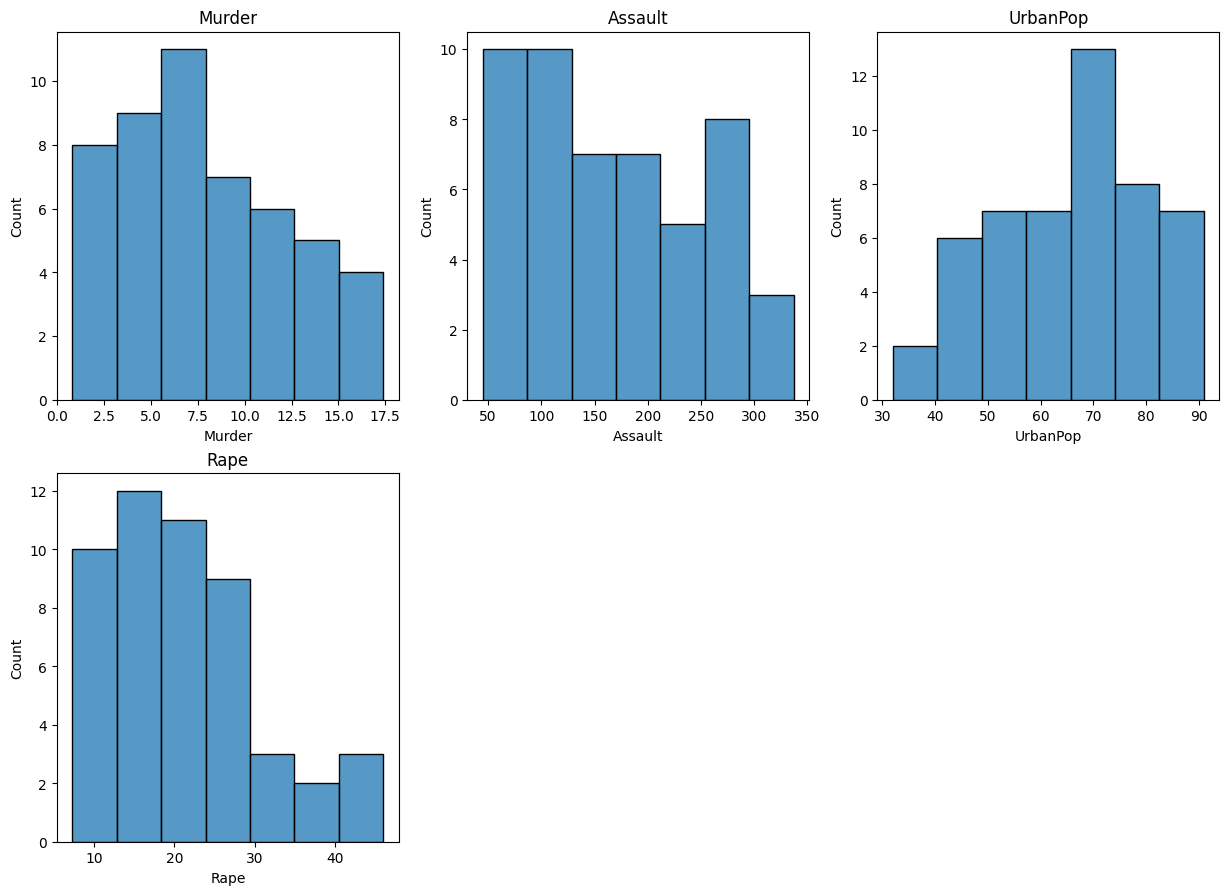

In [7]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,22))

for i in numerical_features:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= crimedata, x= i)

    c = c + 1

plt.show()

# Outliers 

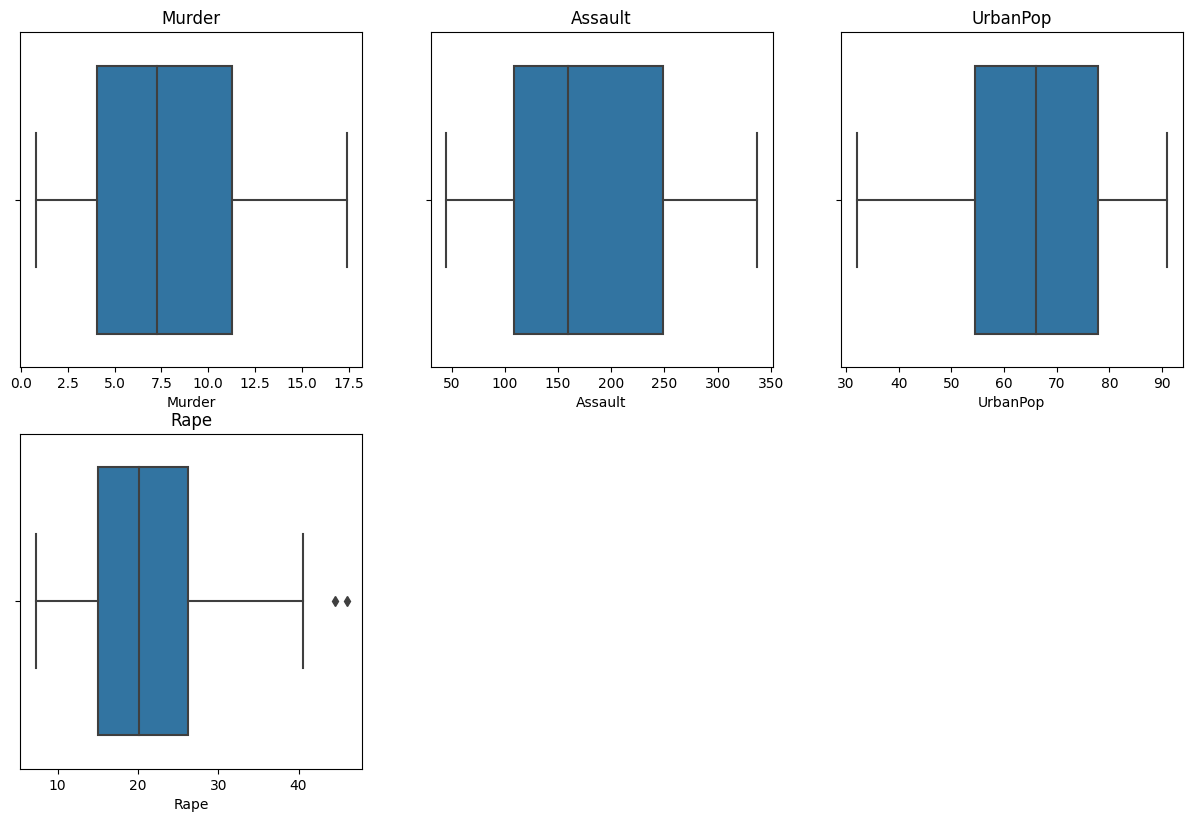

In [11]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,20))

for i in numerical_features:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.boxplot(data= crimedata, x= i)

    c = c + 1

plt.show()

## There are almost no outliers in the given dataset 

In [13]:
for i in numerical_features:
    s = crimedata[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"Details of {i} \n", "IQR = ", iqr, "\n", "IQR lower ", iqr_lower, "\n" , "IQR upper ",iqr_upper, "\n" ,"outliers = ", outliers, "\n"
         
    )

Details of Murder 
 IQR =  7.175 
 IQR lower  -6.687499999999999 
 IQR upper  22.0125 
 outliers =  {} 

Details of Assault 
 IQR =  140.0 
 IQR lower  -101.0 
 IQR upper  459.0 
 outliers =  {} 

Details of UrbanPop 
 IQR =  23.25 
 IQR lower  19.625 
 IQR upper  112.625 
 outliers =  {} 

Details of Rape 
 IQR =  11.100000000000001 
 IQR lower  -1.5750000000000028 
 IQR upper  42.825 
 outliers =  {1: 44.5, 27: 46.0} 



# K Mean Clustering 

In [15]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [17]:
df_norm = norm_func(crimedata.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [18]:
df_norm.isna().sum() #missing values 

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [19]:
###### scree plot or elbow curve ############
TWSS = []
k = [*range(2, 9)]

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

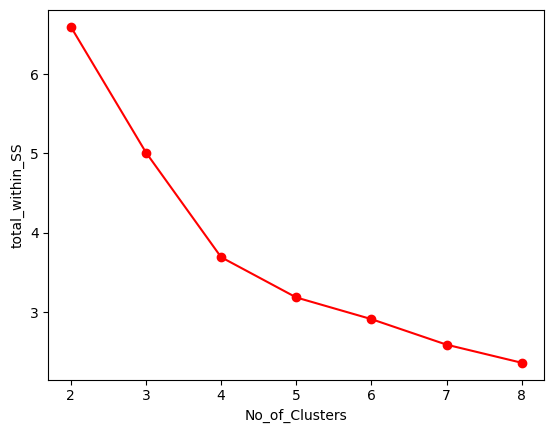

In [20]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

## Selecting 4 clusters from above graph

In [22]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [23]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
crimedata['clust'] = mb # creating a  new column and assigning it to new column

In [25]:
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [26]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [28]:
crimedata.iloc[:, 2:8].groupby(crimedata.clust).mean()

,Assault,UrbanPop,Rape,clust
clust,,,,
0,78.538462,52.076923,12.176923,0
1,264.000000,76.500000,33.608333,1
2,141.176471,73.647059,19.335294,2
3,243.625000,53.750000,21.412500,3


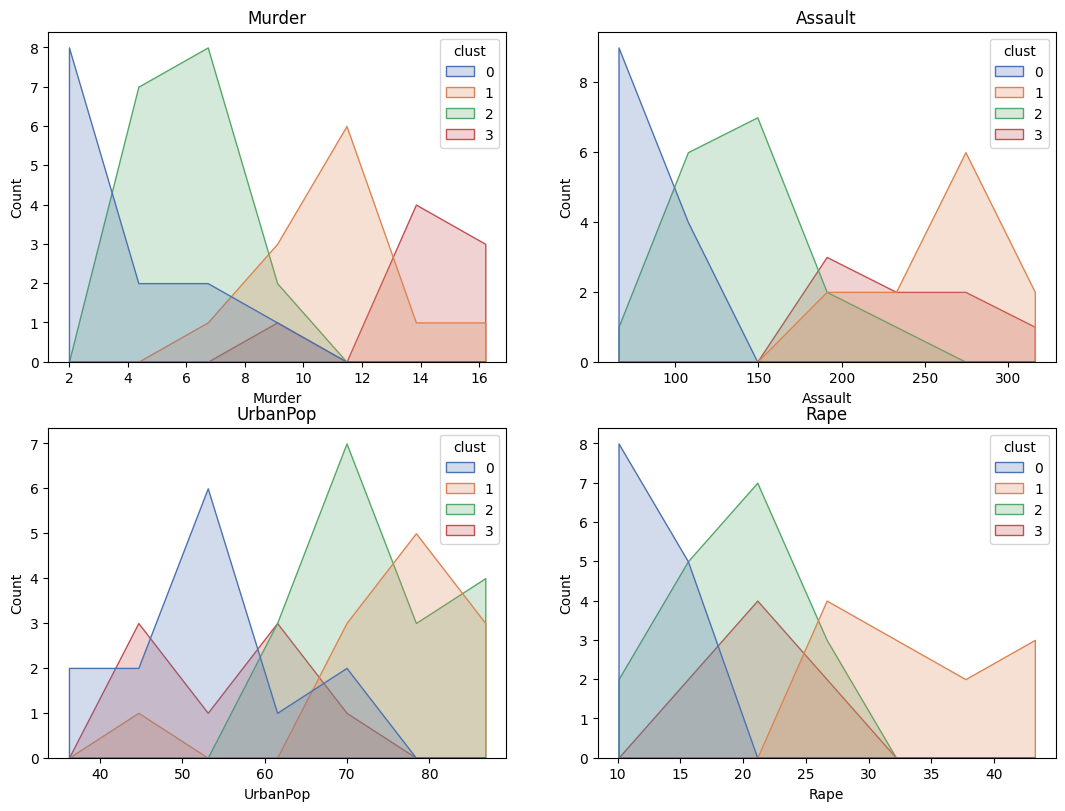

In [32]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,30))

for i in numerical_features:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= crimedata, hue= "clust",palette="deep", element= "poly" )
    plt.title(f"{i}")

    c = c + 1

plt.show()

In [35]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(crimedata[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [36]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


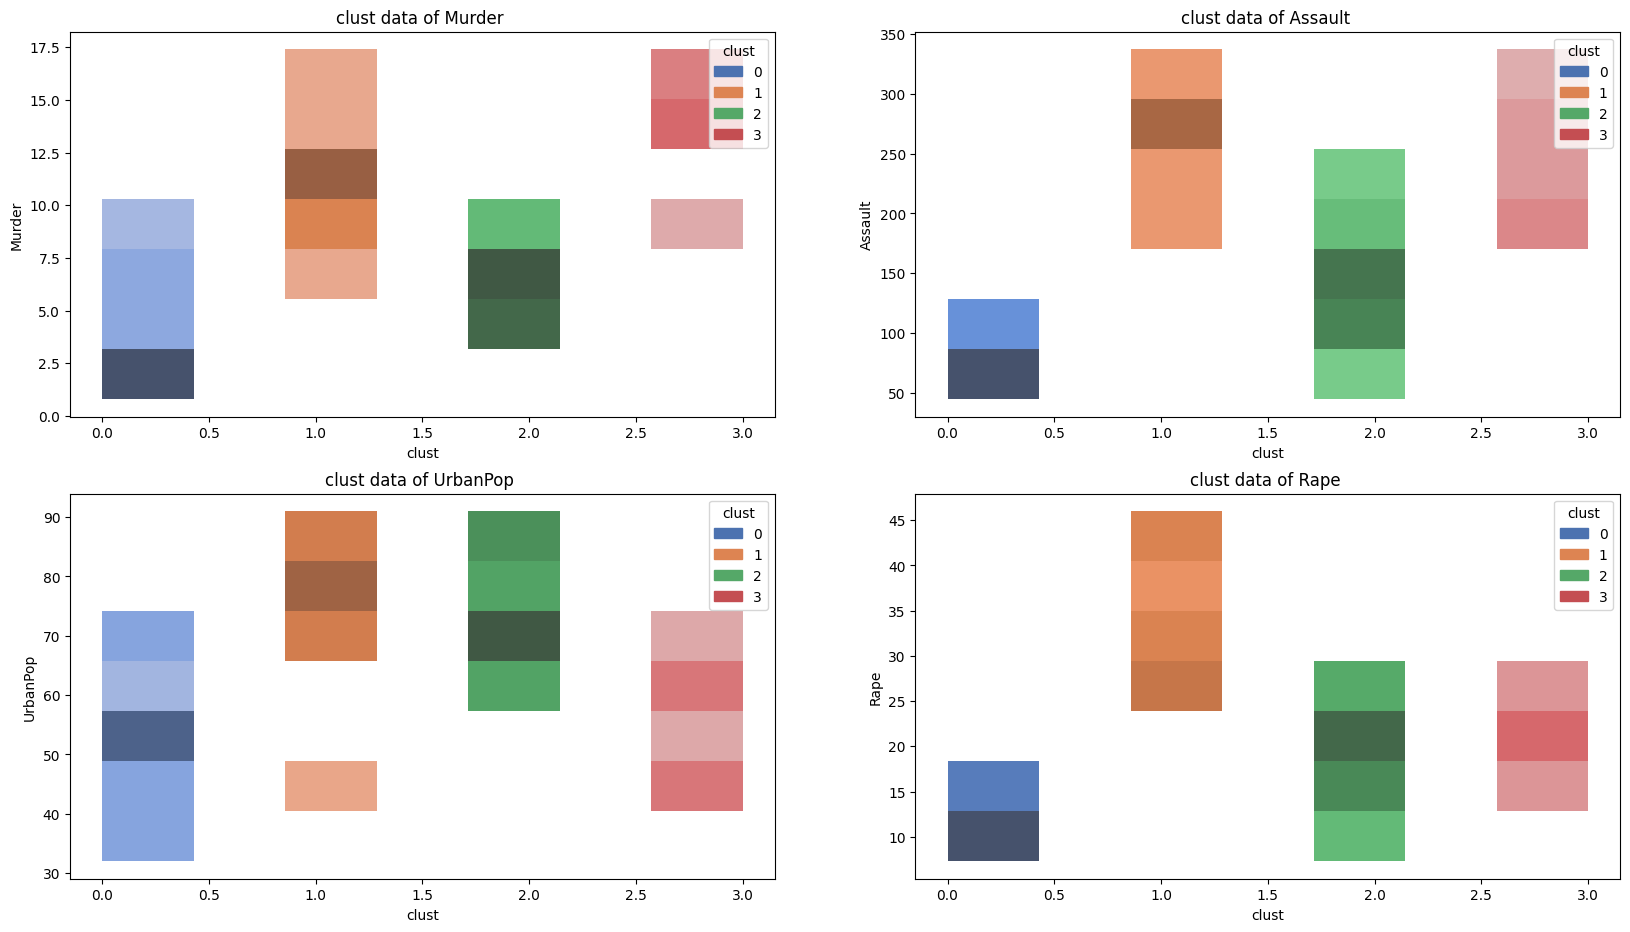

In [41]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,35))

for i in continuous_feature:
    plt.subplot(a, b, c)
    plt.title(f"clust data of {i} ")
    sns.histplot(x= "clust" , y = i ,data= crimedata, hue= "clust",palette="deep")

    c = c + 1

plt.show()

In [45]:
crimedata.rename(columns = {"Unnamed: 0":'City'}, inplace = True)
crimedata

,City,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3
